In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Prime TV Shows Data set.csv',encoding='latin-1')
df.head(1)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+


In [3]:
#to check null values in dataset
df.isnull().sum()

S.no.                        0
Name of the show            11
Year of release             11
No of seasons available     11
Language                    11
Genre                       11
IMDb rating                222
Age of viewers              11
dtype: int64

In [4]:
df['Name of the show'].fillna(df['Name of the show'].value_counts().index[0],inplace=True)

In [8]:
df['Year of release'].fillna(df['Year of release'].value_counts().index[0],inplace=True)

In [10]:
df['No of seasons available'].fillna(df['No of seasons available'].value_counts().index[0],inplace=True)

In [11]:
df['Language'].fillna(df['Language'].value_counts().index[0],inplace=True)

In [12]:
df['Genre'].fillna(df['Genre'].value_counts().index[0],inplace=True)

In [13]:
df['IMDb rating'].fillna(df['IMDb rating'].value_counts().index[0],inplace=True)

In [14]:
df['Age of viewers'].fillna(df['Age of viewers'].value_counts().index[0],inplace=True)

In [5]:
df['Name of the show'].isnull().sum()

0

In [9]:
df['Year of release'].isnull().sum()

0

<AxesSubplot:>

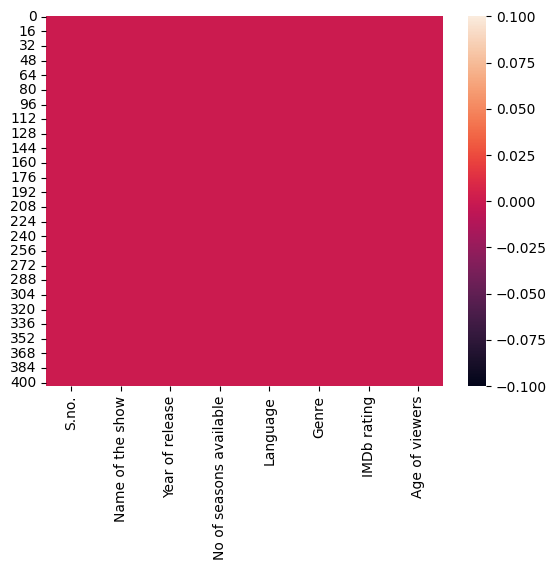

In [15]:
sns.heatmap(df.isnull())

In [21]:
#which show has maximum num. of seasons
df.columns
df[df['No of seasons available']==df['No of seasons available'].max()]['Name of the show']

229    Forensic Files
Name: Name of the show, dtype: object

In [25]:
#which show release first
df.columns
df[df['Year of release']==df['Year of release'].min()]['Name of the show']


201    The Cecil B. DeMille Classics Collection
Name: Name of the show, dtype: object

<AxesSubplot:>

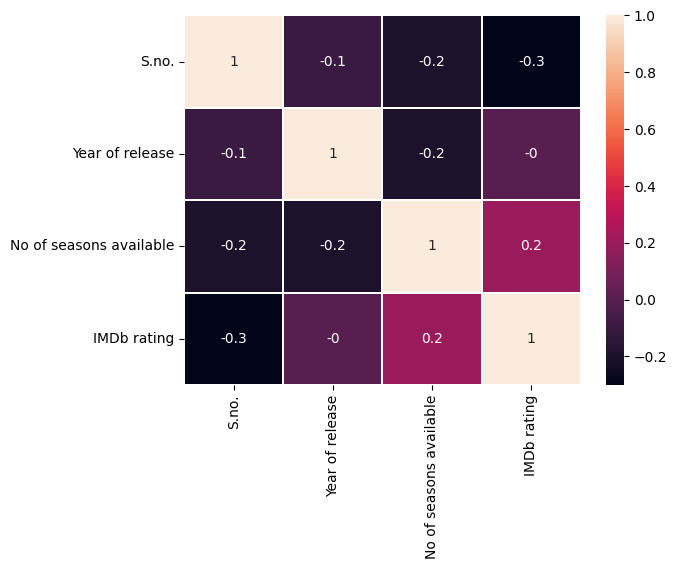

In [35]:
#relation among columns
sns.heatmap(df.corr().round(1),annot=True,linewidths=0.2)

<AxesSubplot:xlabel='Age of viewers', ylabel='count'>

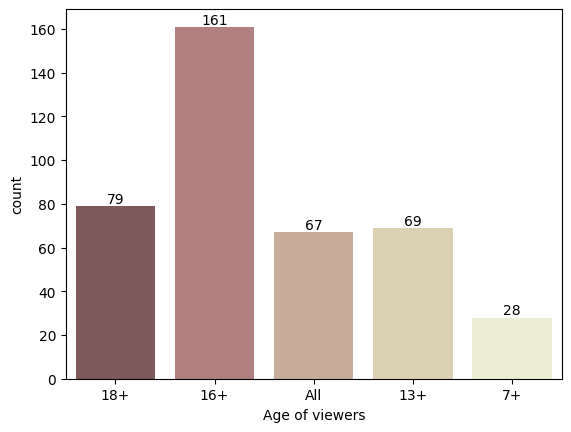

In [46]:
#types(age) of viewers
df.columns
df['Age of viewers'].value_counts()
ax=sns.countplot(x='Age of viewers',data=df,palette='pink')
for i in ax.containers:
    ax.bar_label(i,)
ax

<AxesSubplot:xlabel='Language'>

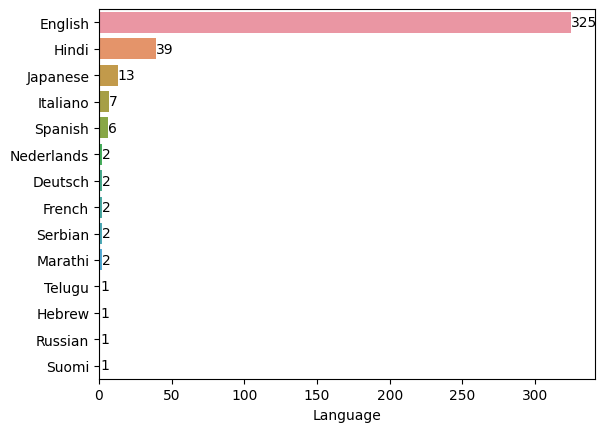

In [52]:
#in which language max. shows were released
df.columns
lang=df['Language'].value_counts()
ax=sns.barplot(x=lang,y=lang.index)
for i in ax.containers:
    ax.bar_label(i,)
ax

<AxesSubplot:xlabel='Genre'>

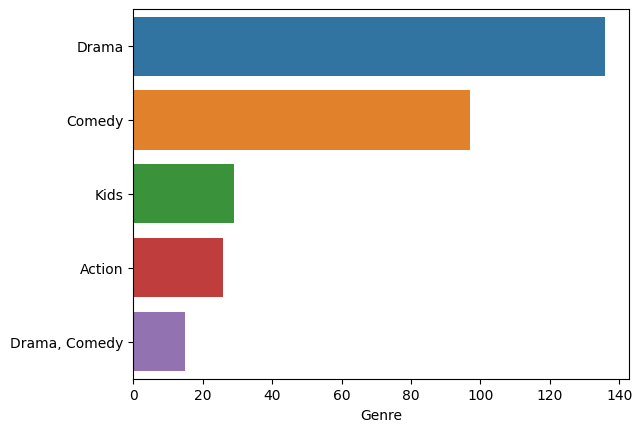

In [55]:
#which type of genre most preffered by viewers
gen=df.Genre.value_counts().head()
sns.barplot(x=gen,y=gen.index)

In [76]:
#highest rated shoows in hindi lang.
m=df[df['Language']=='Hindi'].sort_values(by='IMDb rating',ascending=False).head()
m[['IMDb rating','Name of the show']]

,IMDb rating,Name of the show
37,8.7,Hostel Daze
8,8.6,The Family Man
7,8.5,Mirzapur
16,8.4,Breathe
5,8.3,Made in Heaven


In [82]:
#highest rated shoows in English lang.
n=df[df['Language']=='English'].sort_values(by='IMDb rating',ascending=False).head()
n[['IMDb rating','Name of the show']]


,IMDb rating,Name of the show
20,9.0,The Test: A New Era for Australia's Team
281,8.8,Seinfeld
4,8.7,Fleabag
12,8.7,The Boys
49,8.7,Downtown Abbey


<AxesSubplot:xlabel='rating', ylabel='no. of shows'>

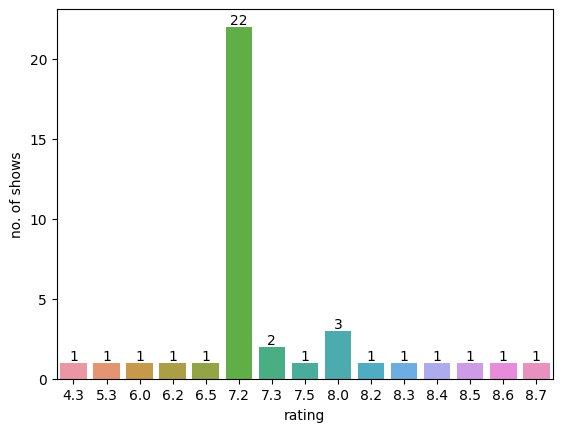

In [101]:
#most common rating given by people in hindi lang.
m=df[df['Language']=='Hindi']['IMDb rating'].value_counts().sort_values(ascending=False)
n=sns.barplot(x=m.keys(),y=m)
n.set(xlabel='rating',ylabel='no. of shows')
for i in n.containers:
    n.bar_label(i,)
n

7.2    183
7.1      9
7.5      9
8.0      8
8.2      7
7.3      7
6.9      7
7.6      7
7.7      7
8.7      6
Name: IMDb rating, dtype: int64

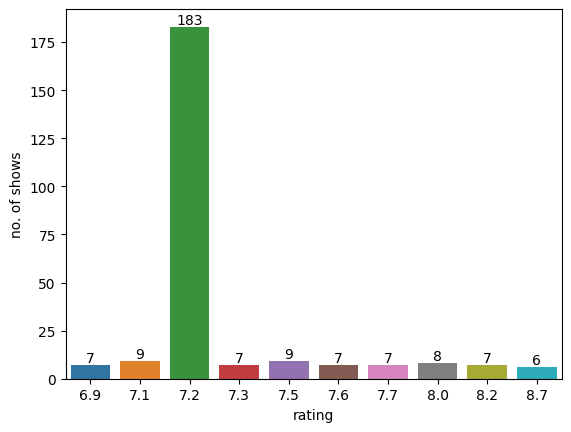

In [111]:
#10 most common rating given by people in english lang.
m=df[df['Language']=='English']['IMDb rating'].value_counts().sort_values(ascending=False).head(10)
n=sns.barplot(x=m.keys(),y=m)
n.set(xlabel='rating',ylabel='no. of shows')
for i in n.containers:
    n.bar_label(i,)
n
df[df['Language']=='English']['IMDb rating'].value_counts().sort_values(ascending=False).head(10)

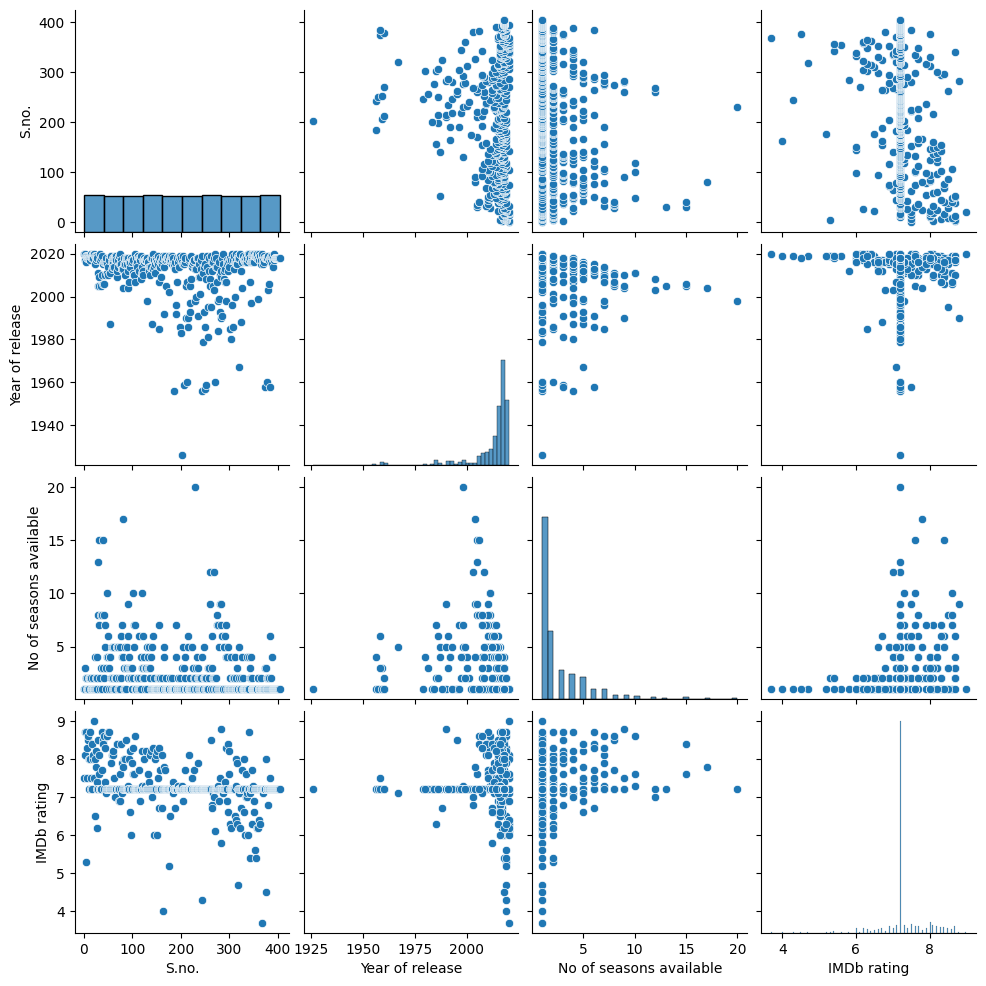

In [113]:
sns.pairplot(df)

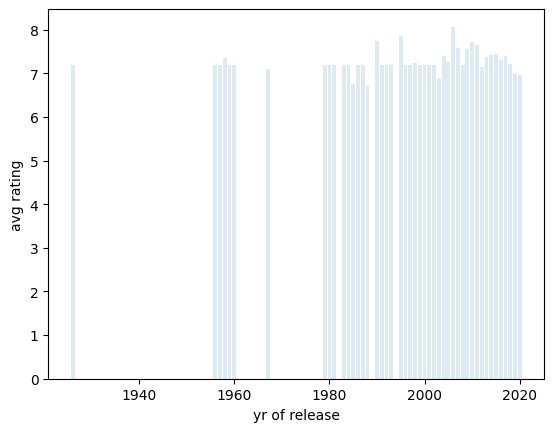

In [124]:
#imdb rating with respect to yr. of release
plt.bar(df.groupby('Year of release')['Year of release'].count().index,df.groupby('Year of release')['IMDb rating'].mean(),alpha=0.15)
plt.xlabel('yr of release')
plt.ylabel('avg rating')
plt.show()


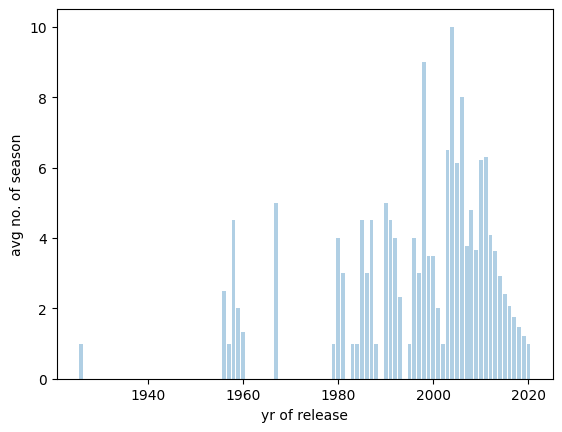

In [125]:
#number of season available w.r.t yr of release
plt.bar(df.groupby('Year of release')['Year of release'].count().index,df.groupby('Year of release')['No of seasons available'].mean(),alpha=0.35)
plt.xlabel('yr of release')
plt.ylabel('avg no. of season')
plt.show()

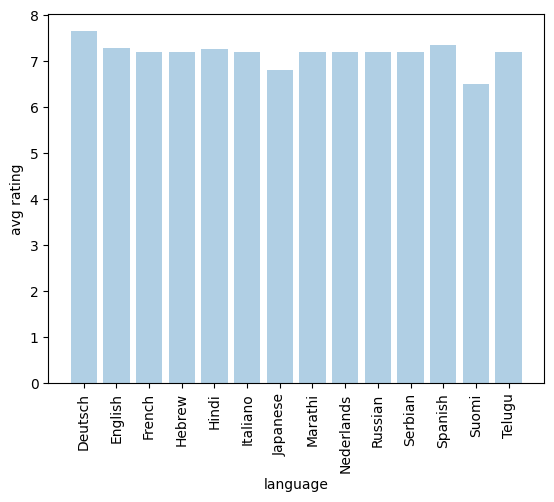

In [130]:
#highest imdb rating w.r.t lang.
plt.bar(df.groupby('Language')['Language'].count().index,df.groupby('Language')['IMDb rating'].mean(),alpha=0.35)
plt.xlabel('language')
plt.ylabel('avg rating')
plt.xticks(rotation='vertical')
plt.show()

In [131]:
df.head(1)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+


In [132]:
df.dtypes

S.no.                        int64
Name of the show            object
Year of release            float64
No of seasons available    float64
Language                    object
Genre                       object
IMDb rating                float64
Age of viewers              object
dtype: object

<AxesSubplot:xlabel='Age of viewers', ylabel='Genre'>

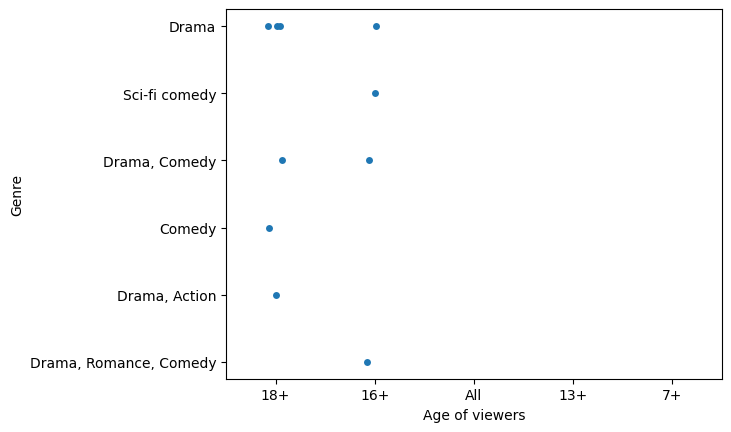

In [140]:
#to show categorical data using graph
#graph b/w genre amd viewers (viewer preffer which kind of genre)
m=df.Genre.head(10)
sns.stripplot(y=m,x='Age of viewers',data=df)

<AxesSubplot:xlabel='Age of viewers', ylabel='Genre'>

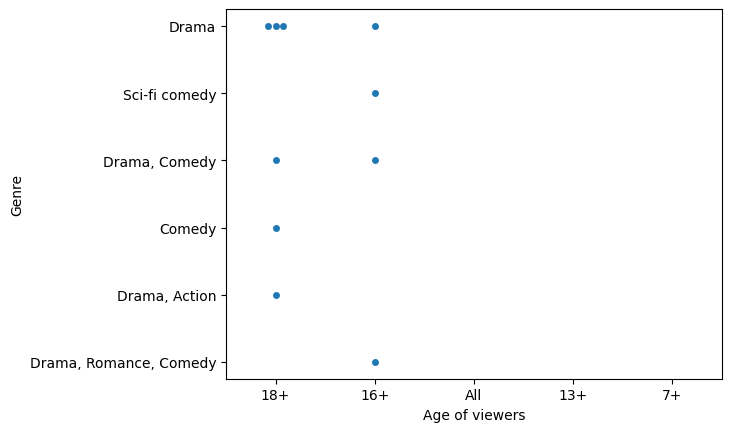

In [148]:
#it is same as stripplot but as we can see the difference
#that here markers are not overlapping 
m=df.Genre.head(10)
sns.swarmplot(y=m,x='Age of viewers',data=df)

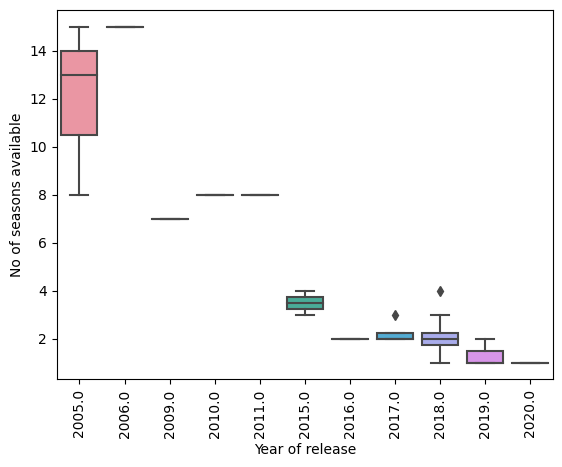

In [155]:
#we can use boxplot only for numerical data and for categorical data it'll show error
m=df['Year of release'].head(40)
sns.boxplot(y='No of seasons available',x=m,data=df)
plt.xticks(rotation='vertical')
plt.show()

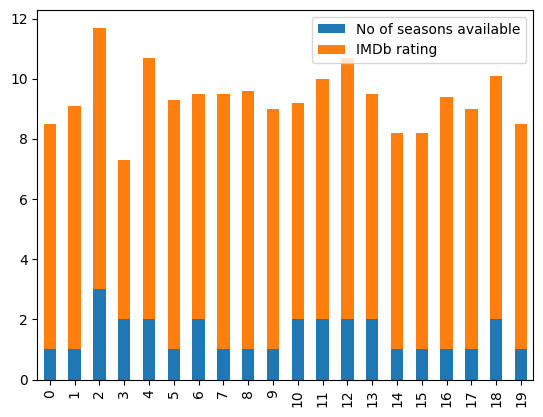

In [168]:

m=pd.DataFrame(df.head(20),columns=['No of seasons available','IMDb rating'])
m.plot.bar(stacked=True);

In [175]:
#highlight the latest movie
def latest(column):
    highli='background-color: palegreen;'
    default=''
    val=column.max()
    return[highli if v==val else default for v in column]
df.style.apply(latest,subset=['Year of release'],axis=0)  

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.000000,1.000000,Hindi,Drama,7.500000,18+
1,2,Upload,2020.000000,1.000000,English,Sci-fi comedy,8.100000,16+
2,3,The Marvelous Mrs. Maisel,2017.000000,3.000000,English,"Drama, Comedy",8.700000,16+
3,4,Four More Shots Please,2019.000000,2.000000,Hindi,"Drama, Comedy",5.300000,18+
4,5,Fleabag,2016.000000,2.000000,English,Comedy,8.700000,18+
5,6,Made in Heaven,2019.000000,1.000000,Hindi,Drama,8.300000,18+
6,7,Homecoming,2018.000000,2.000000,English,Drama,7.500000,16+
7,8,Mirzapur,2018.000000,1.000000,Hindi,Drama,8.500000,18+
8,9,The Family Man,2019.000000,1.000000,Hindi,"Drama, Action",8.600000,18+
9,10,Modern Love,2019.000000,1.000000,English,"Drama, Romance, Comedy",8.000000,16+
